In [1]:
import os
import platform
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beta=4.03
ml=0.1
mh=0.2

NT=64

ncstart=200
ncfinish=2200
step=5
NCFG=(ncfinish-ncstart)/step

def mesonDatasetToNumpy(dataset):
    data = dataset['corr']
    arr = []
    for elem in data:
        arr.append(complex(elem[0],elem[1]))
    return np.array(arr)

In [5]:
userDir=os.path.expanduser('~')
dataDir=''

dataDir=os.path.join(userDir,'Documents','LatticeQCD','PIPI','b{}_ml{}_mh{}'.format(beta,ml,mh))

pionDir=os.path.join(dataDir,'mesons')

In [10]:
pionCorrs={}
sourceTimes=[i for i in range(0,64,8)]
for tsource in sourceTimes:

    corrs=[]
    for cfg in range(ncstart, ncfinish, step):
        fileName=os.path.join(pionDir,'wall_ll.t{}.{}.h5'.format(tsource,cfg))
        file = h5py.File(fileName,'r')
        meson0=file['meson']['meson_0']
        corr = mesonDatasetToNumpy(meson0)
        corr = np.roll(corr, -tsource)
        corrs.append(corr)

    pionCorrs[tsource]=np.asarray(corrs)

In [15]:
avgPionCorr=pionCorrs[sourceTimes[0]]
for t0 in sourceTimes[1:]:
    avgPionCorr+=pionCorrs[t0]
avgPionCorr=avgPionCorr/len(sourceTimes)

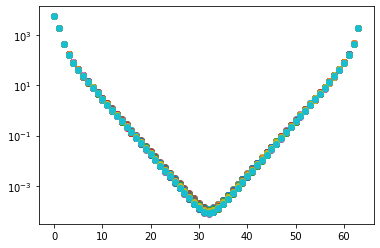

In [16]:
plt.yscale('log')
for corr in avgPionCorr:
    plt.plot(np.real(corr),linestyle="",marker="o")
plt.show()

In [17]:
np.shape(avgPionCorr)

(400, 64)

In [24]:
from jk import *
from utils import *

efm=jackKnife(log_effective_mass,avgPionCorr)

/home/chris/Code/LQCD/SU4_PiPi_Analysis/utils.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))


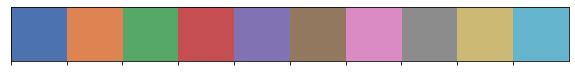

In [18]:
import lsqfit
from model_avg_paper import *
from model_avg_paper.test_tmin import test_vary_tmin_SE
import gvar as gv

In [20]:
data = {'t': np.asarray([t for t in range(int(NT/2))]), 'ND': NCFG, 'yraw': np.real(avgPionCorr[:,0:int(NT/2)])}
data['y']=gv.dataset.avg_data(data['yraw'])

In [ ]:
lsqfit.nonlinear_fit(
    data=(data['t'], data['y']),
    fcn = fit_model, 
    prior=priors
)